# Module 3 Project

## Predicting a Win in PUBG: one vs. all

## Jason Richards PT011419

### Introduction

Player Unknown's Battlegrounds (PUBG) is an online multiplayer Battle Roayale style "shooter" game. The game was developed and published by PUBG corporation, a subsidy of Bluehole game company in South Korea. The game, inspired by a 2000 Japanese film "Battle Royale" was conceived in many iterations by Brendan Greene (a.k.a. Player Unknown). The game was first released via PC in Beta format in March 2017, with a full PC release in December of the same year. The game was quickly converted to play on console with the XBox in September of 2018, and is now avaialble on Playstation and Nintendo as well as mobile versions in Android and iOS. The game is one of the most popular selling games of all time and has over 400 million players worldwide.

Battlegrounds is a player v player online match where up to 100 players can participate. Players can enter a match solo, duo (with one teammate) or in a squad of up to four players. The match starts with a players being parachuted from a plane over a map. The trajectory of the plane varies per match, so players must quickly decide when to eject to land at a selected location. Players are dropped without any weapons or gear, which is randomly placed around the entirety of the map. Players can search buildings, abandoned homes and industrial complexes to scavenge for protective gear, weapons, healing items and boosts (energy drink, painkillers) all while eliminating players they come across. The palyable area will begin to shrink and forces battle between leftover players. Also during the game, areas are bombed to also force continued movement of players. The goal is to eliminate all remaining players or teams and be the last standing. The reward is the title of "winner, winner chicken dinner". 

As the battle royale format of play has become extremely popular, competition has become fierce. Direct cpompetitors such as Fortnite and Apex Legends have mirrored the style of play while developing their own niches. Major game developers have also realized this popularity and have released battle royale modes for such popular titles as Call of Duty (Infinity Ward) and Battlefield (DICE). Fortnite seems to be the direct competitor to PUBG, with a vast following and availability on PC, console and mobile formats.

The current landscape of competitiveness in this style of game has been content. As many of these games were released free or at an extrelmely reduced rate, content is where money is generated and interest is kept. New weapons, maps, equipment and character customizations have been what is steadily keeping these products in the consumers' minds. Leaderboard placement and winning is also important to those players with a vested commitment to the game. It is with this that we will take a look to see which, if any particular features in the PUBG game attribute to placing 1st (winning) the match. This may open insights to what aspects of the game may need reinforced or improved upon.

### Dataset

The dataset was obtained from a Kaggle dataset that was put in place by the publisher for a competition to determine the winner of a match using the features provided. There is a training and test dataset. The training dataset comes with 4.45 million observations separated into 29 columns. The test dataset comprises 1.34 million observations and 28 columns (target column removed). 

### Data Dictionary
* DBNOs - Number of enemy players knocked. (incapacitated but not killed)
* assists - Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* heals - Number of healing items used.
* Id - Player’s Id
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”. 
* killStreaks - Max number of enemy players killed in a short amount of time.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* matchDuration - Duration of match in seconds.
* matchId - ID to identify match. There are no matches that are in both the training and testing set.
* matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches. 
* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters. 
* teamKills - Number of times this player killed a teammate. 
* vehicleDestroys - Number of vehicles destroyed. 
* walkDistance - Total distance traveled on foot measured in meters.
* weaponsAcquired - Number of weapons picked up.
* winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”. 
* groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* numGroups - Number of groups we have data for in the match.
* maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements. 
* winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

### We will utilize the OSEMiN process (Obtain, Scrub, Explore, Model, iNterpret) for this project.

## Obtain

First, we will import popular Python packages to obtain and take an initial look at our dataset to see what needs to be scrubbed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
dftrain=pd.read_csv('train_V2.csv')

In [2]:
# looking at datatypes, observation counts and feature information
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [3]:
# taking a look at the first few rows of data to get a better idea of the dataset
dftrain.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
# finding general statistical information about the dataset to check for any anomolies.
dftrain.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


There are over 4 million observations and some obvious features that would not correlate with solo play vs. team play. For this reason, the dataset will be split into the most popular mode of solo, duo and squad matches. This will allow a more manageable dataset and allow for different modes to be handled individually. 

In [3]:
#splitting dataset into separate datasets for mode type of play
solofpp = dftrain[dftrain.matchType == 'solo-fpp']
duofpp = dftrain[dftrain.matchType == 'duo-fpp']
squadfpp = dftrain[dftrain.matchType == 'squad-fpp']

This particular notebook will cover solo play. The project will be revisited with the combination of models produced from the different datasets to be used to create a function that will run each tuned and optimized  model for each game type to predict future gameplay.

In [6]:
#checking dataset information for solo play
solofpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536762 entries, 4 to 4446965
Data columns (total 29 columns):
Id                 536762 non-null object
groupId            536762 non-null object
matchId            536762 non-null object
assists            536762 non-null int64
boosts             536762 non-null int64
damageDealt        536762 non-null float64
DBNOs              536762 non-null int64
headshotKills      536762 non-null int64
heals              536762 non-null int64
killPlace          536762 non-null int64
killPoints         536762 non-null int64
kills              536762 non-null int64
killStreaks        536762 non-null int64
longestKill        536762 non-null float64
matchDuration      536762 non-null int64
matchType          536762 non-null object
maxPlace           536762 non-null int64
numGroups          536762 non-null int64
rankPoints         536762 non-null int64
revives            536762 non-null int64
rideDistance       536762 non-null float64
roadKills        

Only one data point is missing from the target column. We will remove that observation row completely as it won't disturb any results by eliminating one observation.

In [4]:
solofpp.dropna(inplace=True)

As we will be using classification models to predict match outcome, we will eliminate unnecessary categorical data.

In [5]:
solofpp = solofpp.drop(['Id', 'groupId', 'matchId', 'matchType'], axis=1)

In [9]:
#recheck first few rows of data
solofpp.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,0,0,100.000,0,0,0,45,0,1,1,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,0,0,8.538,0,0,0,48,1000,0,0,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,0,1,324.200,0,1,5,5,986,4,1,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,0,3,254.300,0,0,12,13,0,2,1,...,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,0,0,136.900,0,0,0,37,0,1,1,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


In [10]:
#recheck basic statistical data 
solofpp.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,536761.000000,536761.000000,536761.000000,536761.0,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,...,536761.0,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000,536761.000000
mean,0.057640,1.058980,118.918804,0.0,0.251553,1.009678,48.025596,460.651884,0.934731,0.482457,...,0.0,403.209692,0.003488,4.824648,0.010183,0.003499,945.309091,3.486528,563.691406,0.491835
std,0.245489,1.791553,158.345782,0.0,0.633480,2.383454,27.579939,606.861920,1.495987,0.556407,...,0.0,1270.646059,0.061611,32.658268,0.100397,0.061398,1075.042738,2.327555,730.821547,0.295021
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,97.090000,2.000000,0.000000,0.236600
50%,0.000000,0.000000,75.790000,0.0,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,467.700000,3.000000,0.000000,0.489100
75%,0.000000,2.000000,171.000000,0.0,0.000000,1.000000,72.000000,1120.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1577.000000,5.000000,1491.000000,0.747400
max,5.000000,28.000000,2305.000000,0.0,16.000000,63.000000,100.000000,1970.000000,23.000000,5.000000,...,0.0,40710.000000,4.000000,1974.000000,1.000000,5.000000,25780.000000,153.000000,1922.000000,1.000000


While we will visualize this data, at first glance, there are alot of 0s that is going to be prevalent in the dataset. This is due to the nature of the game where there is a high rate of kills within the first few minutes of the match. Many players will land in the same areas. Immediate kills lead to 0s in their match. With many features having the min, 25%, 50% and 75% quantiles at 0, this is going to be a pretty imbalanced dataset with some significant outliers to the data. This can be handled by SMOTE, which we can implement after we split the data into features and target.

## Scrub and Explore

Lets take a look at the distribution of each feature.

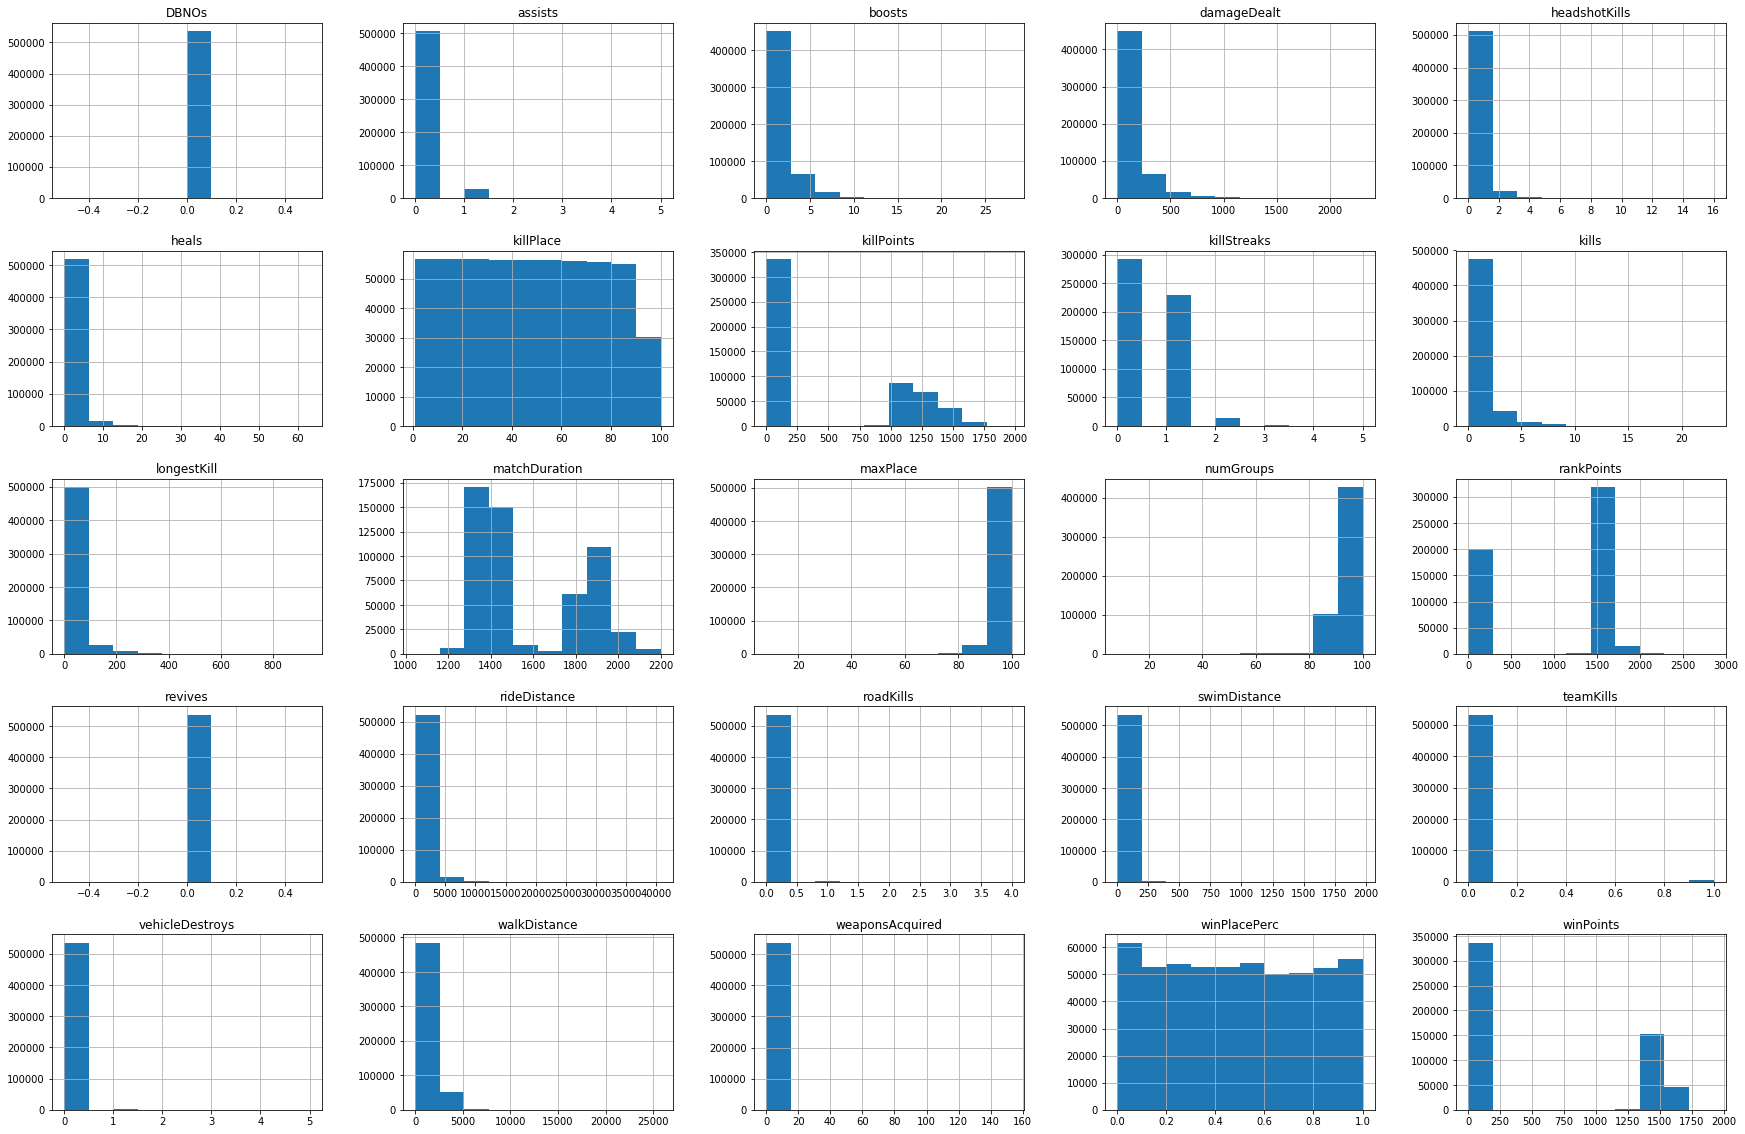

In [11]:
solofpp.hist(figsize=(30,20));

Judging by this visual, we can definitely validate that our data is heavily balanced towards 0 and that other data is spread evenly across the dataset. The even spreading is due to the ranking system...it is always 1-100 so each player will have a rank by one of those numbers per match so the spread will show even for those features.

Now to visualize the correlation of the features to see if there are any additional features that can be eliminated.

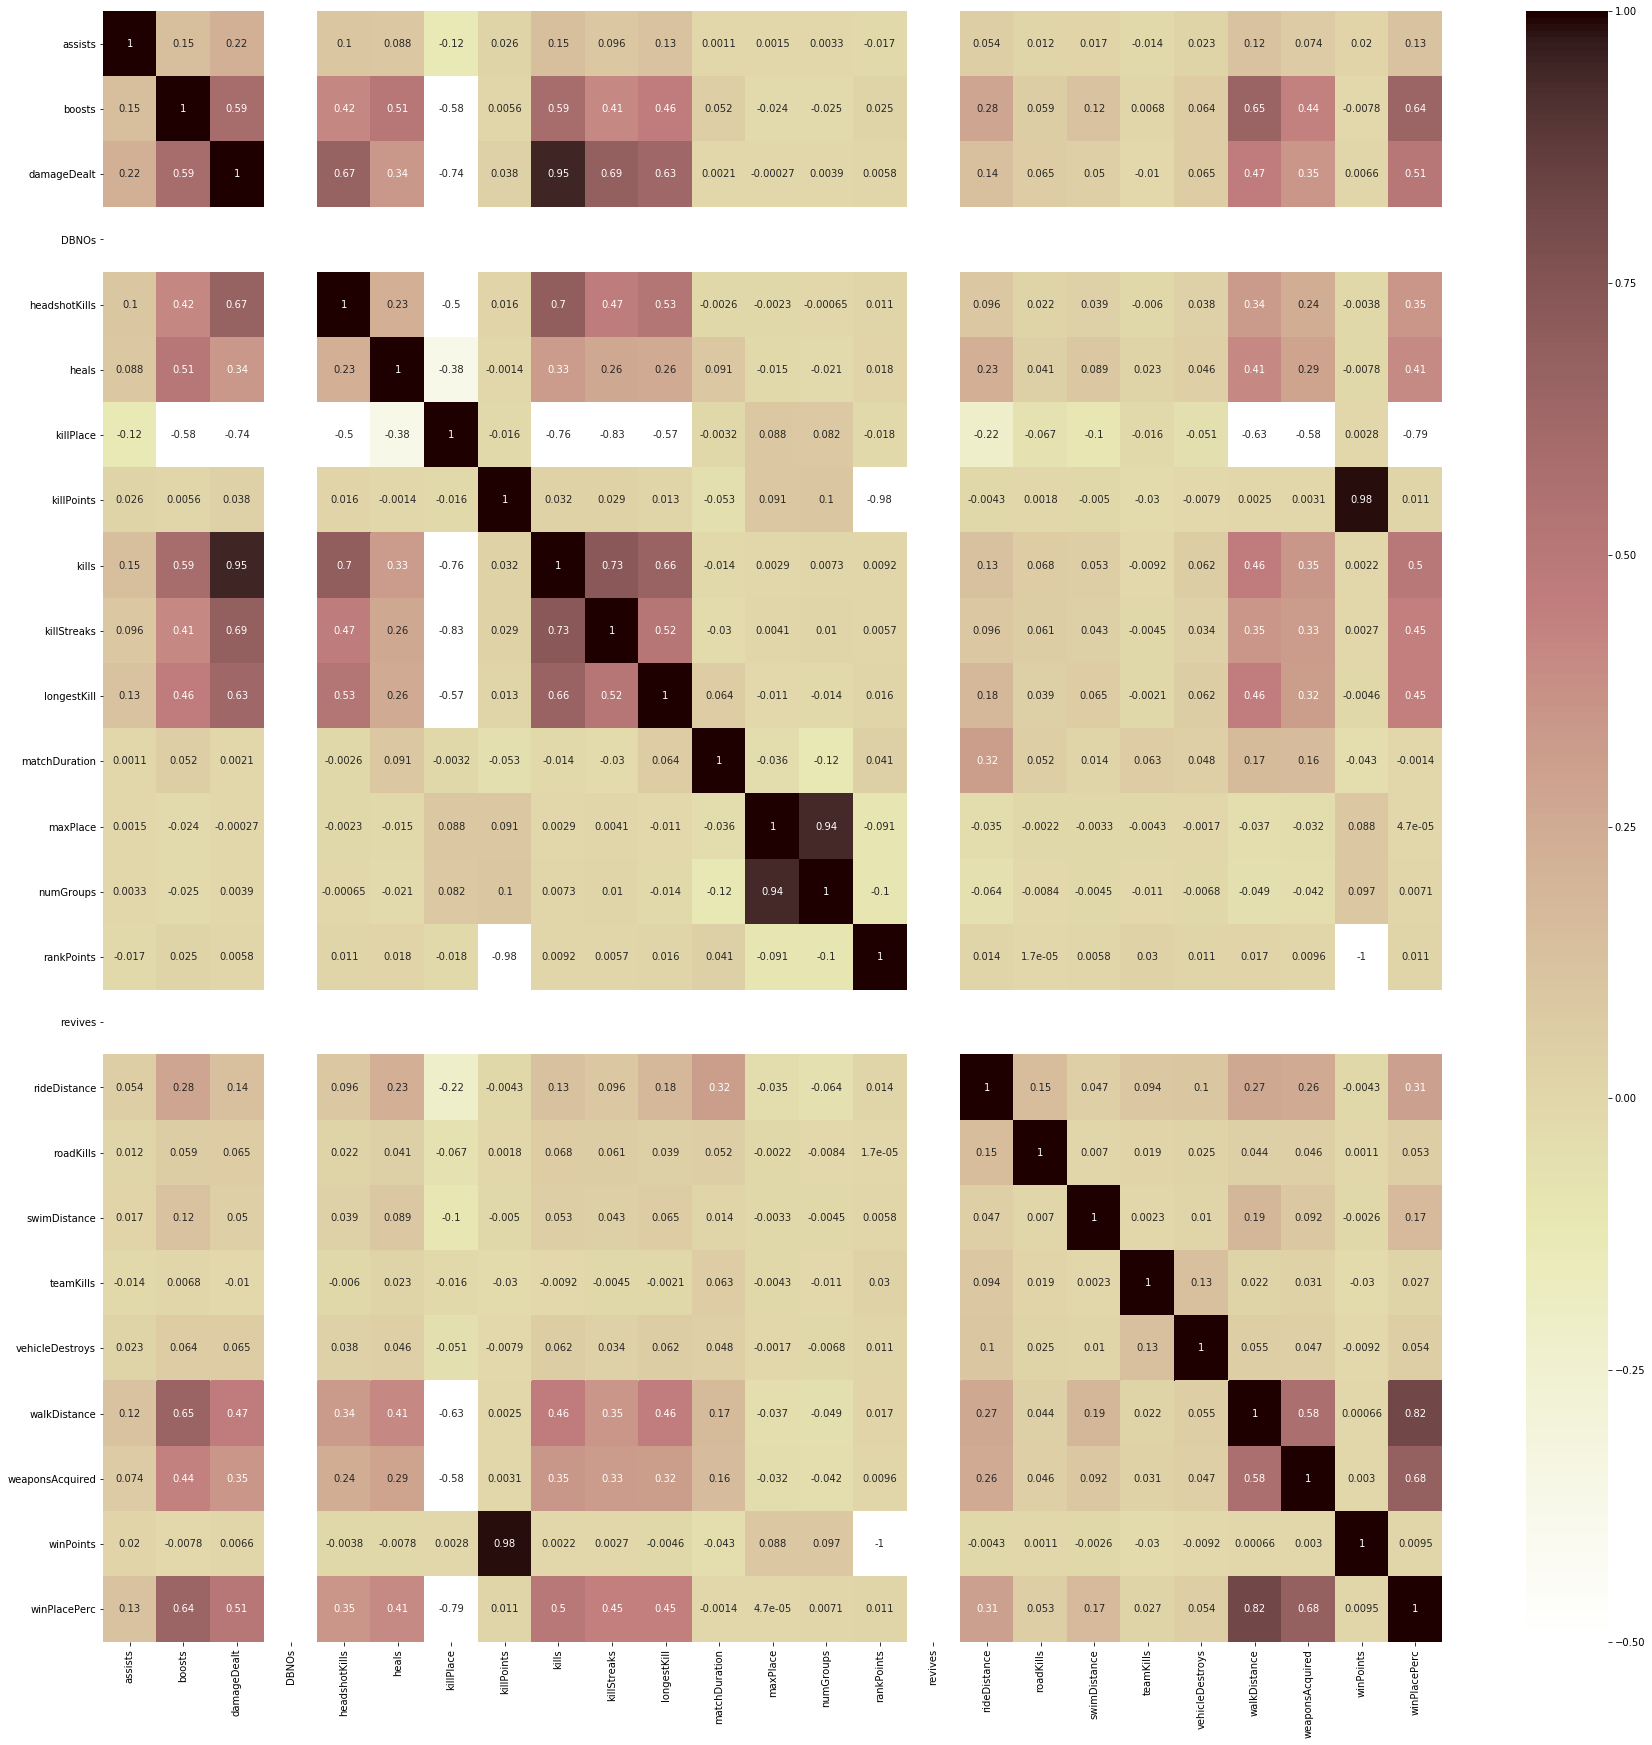

In [12]:
correlation = solofpp.corr()
plt.figure(figsize=(30,30))
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

By the looks of the heatmap, there are some features we can eliminate, based on their collinearity with other features. killPlace, maxPlace rankPoints and winPoints will be removed, these are more result driven data. Revives and DBNOs are not relevant to solo play, which is why there are no values. Those will be removed as well.

In [6]:
dfcoll = solofpp.drop(['killPlace', 'maxPlace', 'rankPoints', 'winPoints', 'revives', 'DBNOs'], axis=1)

Now we will check the remaining data for outliers with boxplots. I will split the features into two boxplots to make more interpretable.

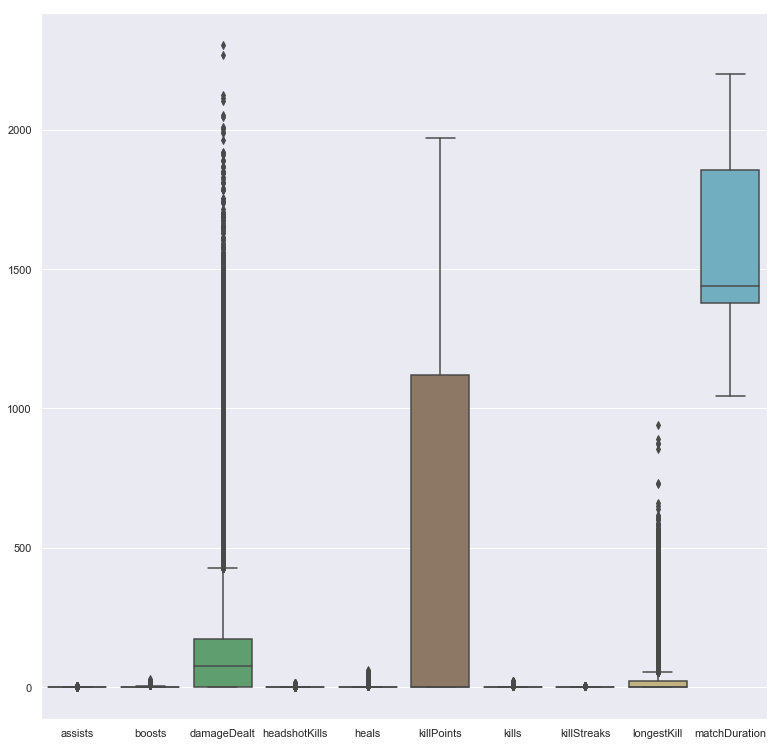

In [14]:
sns.set(rc={'figure.figsize':(13,13)})
sns.boxplot(data=dfcoll.iloc[:,0:10]);

There are some significant outliers regarding longest kill and damage dealt. Before I standardize the data, I want to take care of as many outliers as possible without losing too much data. Removing data will stay at or below 1% of total data for each feature with significant outliers.

In [15]:
print((dfcoll.damageDealt >= 730).sum())
print((dfcoll.matchDuration <= 1000).sum())
print((dfcoll.longestKill >= 500).sum())

5382
0
70


In [7]:
dfcoll[dfcoll.damageDealt <= 730]
dfcoll[dfcoll.matchDuration >= 1000]
dfcoll[dfcoll.longestKill <= 500]

,assists,boosts,damageDealt,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,numGroups,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
4,0,0,100.000,0,0,0,1,1,58.530,1424,95,0.0000,0,0.00,0,0,49.750,2,0.1875
7,0,0,8.538,0,0,1000,0,0,0.000,1967,92,2004.0000,0,0.00,0,0,1089.000,6,0.7368
13,0,1,324.200,1,5,986,4,1,49.830,1886,94,1228.0000,0,76.84,0,0,2050.000,6,0.8750
17,0,3,254.300,0,12,0,2,1,36.000,1371,95,2367.0000,0,15.29,0,0,1787.000,3,0.8211
35,0,0,136.900,0,0,0,1,1,22.830,1425,94,0.0000,0,0.00,0,0,270.700,1,0.3474
48,0,0,194.500,1,1,0,2,1,29.080,2067,94,0.0000,0,0.00,0,0,248.600,5,0.2947
59,0,2,100.000,1,2,0,1,1,21.860,1959,93,0.0000,0,0.00,0,0,1606.000,5,0.6809
89,0,0,46.410,0,0,0,0,0,0.000,1493,94,0.0000,0,0.00,0,0,50.820,1,0.1489
101,1,6,604.700,2,7,0,5,1,99.230,1465,92,0.0000,0,0.00,0,0,1766.000,2,0.9891
106,0,3,76.440,0,2,0,0,0,0.000,1441,95,1054.0000,0,0.00,0,0,1542.000,2,0.8830


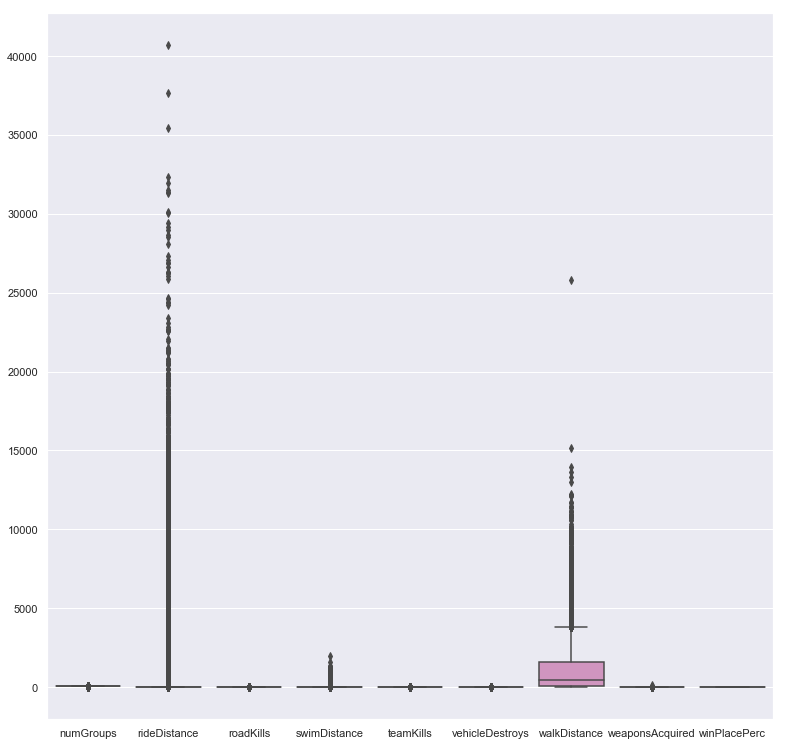

In [17]:
sns.set(rc={'figure.figsize':(13,13)})
sns.boxplot(data=dfcoll.iloc[:,10:]);

In [18]:
print((dfcoll.rideDistance >= 6300).sum())
print((dfcoll.walkDistance >= 5000).sum())

5129
1577


In [8]:
dfcoll[dfcoll.rideDistance >= 6300]
dfcoll[dfcoll.walkDistance <= 5000]

,assists,boosts,damageDealt,headshotKills,heals,killPoints,kills,killStreaks,longestKill,matchDuration,numGroups,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
4,0,0,100.000,0,0,0,1,1,58.530,1424,95,0.0,0,0.00,0,0,49.750,2,0.1875
7,0,0,8.538,0,0,1000,0,0,0.000,1967,92,2004.0,0,0.00,0,0,1089.000,6,0.7368
13,0,1,324.200,1,5,986,4,1,49.830,1886,94,1228.0,0,76.84,0,0,2050.000,6,0.8750
17,0,3,254.300,0,12,0,2,1,36.000,1371,95,2367.0,0,15.29,0,0,1787.000,3,0.8211
35,0,0,136.900,0,0,0,1,1,22.830,1425,94,0.0,0,0.00,0,0,270.700,1,0.3474
48,0,0,194.500,1,1,0,2,1,29.080,2067,94,0.0,0,0.00,0,0,248.600,5,0.2947
59,0,2,100.000,1,2,0,1,1,21.860,1959,93,0.0,0,0.00,0,0,1606.000,5,0.6809
89,0,0,46.410,0,0,0,0,0,0.000,1493,94,0.0,0,0.00,0,0,50.820,1,0.1489
101,1,6,604.700,2,7,0,5,1,99.230,1465,92,0.0,0,0.00,0,0,1766.000,2,0.9891
106,0,3,76.440,0,2,0,0,0,0.000,1441,95,1054.0,0,0.00,0,0,1542.000,2,0.8830


Since this will be a binary classifier, we need to convert the target data. As per the data dictionary, the target data is set as a percentage of placement in the match. Since we will only focus on the 1st place, if the value is less than 1 we will convert it into a 0 as they did not win the match.

In [9]:
#for target data convert any value below 1 into a zero
for x in dfcoll['winPlacePerc']:
    if x < 1:
        dfcoll['winPlacePerc'].replace(to_replace=x,value=0, inplace=True)

Now to see how many winners we have in the dataset.

In [21]:
(dfcoll.winPlacePerc == 1).sum()

5678

About 1% of the data is winners which would be the case. It does, unfortunately, cause an imbalance in the dataset. We can resample the minority after splitting the data into features and target.

In [10]:
target = dfcoll.winPlacePerc

In [11]:
features = dfcoll.drop(['winPlacePerc'], axis = 1)

Now that we have set our target and feature data, in order to handle the imbalance of data, we will resample the minority using SMOTE

In [12]:
from imblearn.over_sampling import SMOTE, ADASYN
features_resample, target_resample = SMOTE().fit_sample(features, target)

Since the data has been transformed to a nunmpy array, we can validate the resample by checking the non-zero values in our target set.

In [25]:
np.count_nonzero(target_resample)

531083

Great, we have about 100x as many winning samples now, our data should be a little more balanced. Before we run our intitial models, we will go ahead and scale the data.

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
f_scale = ss.fit_transform(features_resample)

## Model

We will now run our initial models and compare results. These models will be Logistic Regression, Random Forest and XG Boost.

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (f_scale,target_resample, random_state=0)

A good way to visualize our accuracy through a logistic regression model is by looking at the Recursive Operating Characteristic (ROC) curve of the model.

AUC: 0.9771113517371199


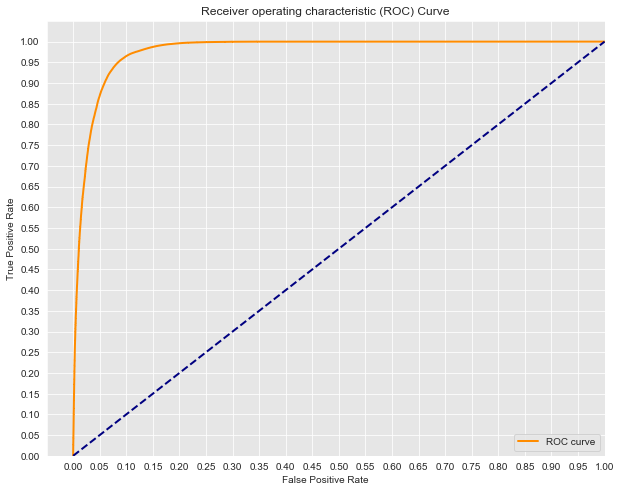

In [15]:
from sklearn.metrics import roc_curve, auc

#Initial Model
logreg = LogisticRegression(fit_intercept = False)

#Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#Visualization for ROC curve
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

This is a high initial result. It is cautiously optimistic, since there could be not-so-good reasons for this result. We can create a confusion matrix to check the predictability of the model by visualizing the True and False Positives and Negatives predicted by the model.

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[122058   7354]
 [ 10688 125442]]


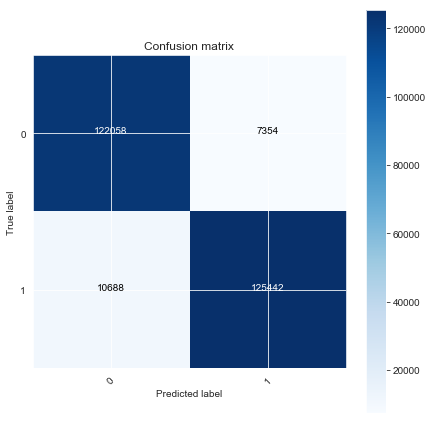

In [19]:
y_hat_test = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Also, let's look at the precision, recall and f-score for this model

In [21]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.91948533, 0.94462183]),
 array([0.94317374, 0.92148681]),
 array([0.93117891, 0.93291091]),
 array([129412, 136130], dtype=int64))

Also high scores and a decent True and False predictive model, the False values are pretty high. Lets see how our features rank by running a Recusive Feature Elimination function on this model.

In [34]:
from sklearn.feature_selection import RFE
predictors=features_resample
selector = RFE(logreg, n_features_to_select = 1)
selector = selector.fit(predictors, target_resample);

In [35]:
selector.ranking_

array([ 7,  6, 14,  9,  8, 18,  3,  2, 16, 12, 10, 17,  4, 11,  1, 15, 13,
        5])

In [36]:
feature_ranks = []
for i in selector.ranking_:
    feature_ranks.append(f"{i} {dfcoll.columns[i]}")
feature_ranks


['7 killStreaks',
 '6 kills',
 '14 teamKills',
 '9 matchDuration',
 '8 longestKill',
 '18 winPlacePerc',
 '3 headshotKills',
 '2 damageDealt',
 '16 walkDistance',
 '12 roadKills',
 '10 numGroups',
 '17 weaponsAcquired',
 '4 heals',
 '11 rideDistance',
 '1 boosts',
 '15 vehicleDestroys',
 '13 swimDistance',
 '5 killPoints']

Now that we have a ranking of features, we can condense this dataset down to reduce noise.

### Random Forest

Confusion matrix, without normalization
[[132262    954]
 [   484 131842]]


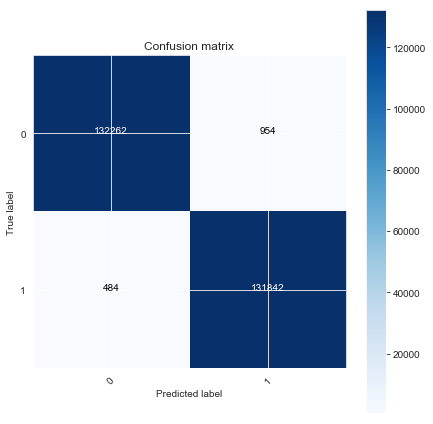

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(f_scale,target_resample, random_state=0)
#Initial Model
ranfor = RandomForestClassifier()

#Probability scores for test set
y_score = ranfor.fit(X_train, y_train)
pred = ranfor.predict(X_test)
y_hat_test = ranfor.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Considering the amount of data, this is a very impressive prediction model.

In [38]:
ranfor.score(X_train, y_train)

0.999566922412581

In [39]:
ranfor.score(X_test, y_test)

0.9946675102243713

This scores very high. There may be noise in the dataset that is causing this, but our training and test data scores are about the same which is a good sign.

In [23]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.99635394, 0.99281605]),
 array([0.9928387 , 0.99634237]),
 array([0.99459321, 0.99457608]),
 array([133216, 132326], dtype=int64))

Also very high scores on precision, recall and f-score.

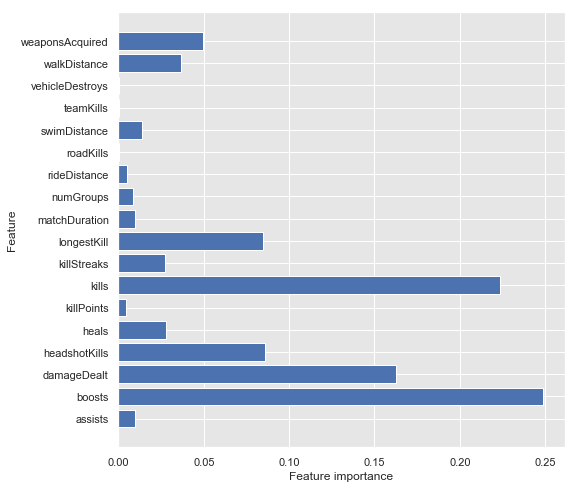

In [40]:
#returns column names to converted array from standardscaler so that visualiztaion will be proerly labeled
X_imputed_df = pd.DataFrame(X_train, columns = features.columns)

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_imputed_df.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(ranfor)

We can see from our visualization that there are definitely some features that are more important than others. We will reduce features before retesting the model.

### XGBoost

In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
training_preds = xgb.predict(X_train)
val_preds = xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 98.45%
Validation accuracy: 98.45%


The accuracy is not as high as the Random Forest model. The training and test accuracy scores, however are very close.

Confusion matrix, without normalization
[[129928   1301]
 [  2818 131495]]


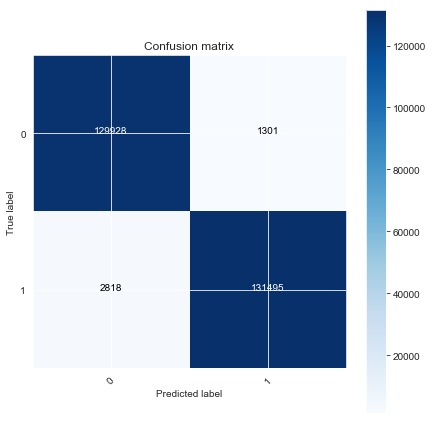

In [25]:
y_hat_test = xgb.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Based on the confusion matrix, the precision is not quite as good as Random Forest on the first round of testing. 

In [26]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.97877149, 0.99020302]),
 array([0.99008603, 0.97901916]),
 array([0.98439625, 0.98457933]),
 array([131229, 134313], dtype=int64))

Also relative precision, recall and f-scores as compared to the other models.

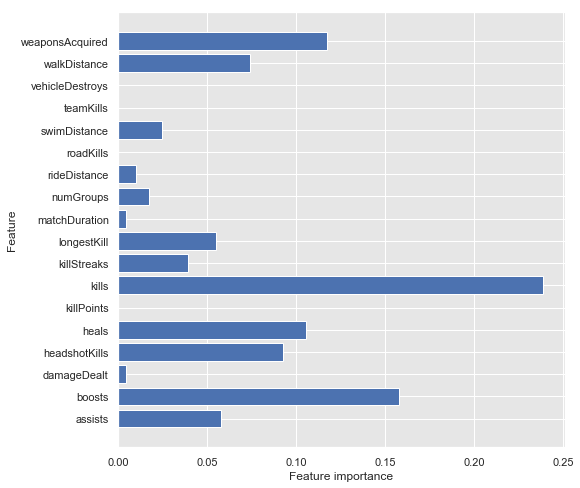

In [43]:
plot_feature_importances(xgb)

While the features are not listed in the same order of importance as the Random Forest model, there are still about eight features that can account for over 90% of the data

## Interpretation

The consensus for the models is that around 8 features account for about 90% of the data. These differ from model to model but will reduce to the top 8 features for each model before exploring hyperparameter tuning. Since the precision, recall and f-scores were high in relation to the models, that further validates the scores that were generated.  Also, we will make sure that we resample the data for each dataset so that we continue to use balanced data.

In [27]:
lrfeatures, lrtarget = SMOTE().fit_sample(dfcoll[['boosts', 'damageDealt', 'headshotKills', 'heals', 'kills', 'killPoints', 'killStreaks']], target)

In [28]:
rffeatures, rftarget = SMOTE().fit_sample(dfcoll[['damageDealt', 'longestKill', 'kills', 'boosts', 'killStreaks', 'heals', 'headshotKills']], target)

In [29]:
xgbfeatures, xgbtarget = SMOTE().fit_sample(dfcoll[['kills', 'walkDistance', 'longestKill', 'weaponsAcquired', 'heals', 'boosts', 'assists', 'headshotKills']], target)

### Hyperparameter Tuning with GridSearch

We will also perform hyperparameter tuning based on our reduced datasets using GridSearch for each model. This will entail setting grid parameters for each model to be tuned. 

We will start with the Logistic Regression model. The values to look at will be the 'C' value and the penalty type.

In [24]:
#logistic regression parameter settings
lr_param_grid = {
    'C': [.0001, .001, .1, 1, 10],
    'penalty': ['l1', 'l2'],
}

Now that we have our parameters, we will rescale the data and perform the GridSearch.

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(fit_intercept=False)
from sklearn.model_selection import GridSearchCV
ss=StandardScaler()
lr_scale = ss.fit_transform(lrfeatures)
lr_grid_search = GridSearchCV(logreg, lr_param_grid, cv=3)
lr_grid_search.fit(lr_scale, lrtarget)
print("Best Parameter Combination Found During Grid Search:")
lr_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'C': 0.1, 'penalty': 'l2'}

For the random forest model, the hyperparameters to test are n_estimators, criterion, max_depth, min_samples_split and min_samples_leaf.

In [48]:
#random forest parameter settings
rf_param_grid = {
    'n_estimators': [200, 300],
    'criterion': ['gini'],
    'max_depth': [10, 13],
    'min_samples_split': [20,30],
    'min_samples_leaf': [8, 10]
}

Again, scale and perform GridSearch.

In [50]:
ss=StandardScaler()
rf_scale = ss.fit_transform(rffeatures)
rf_grid_search = GridSearchCV(ranfor, rf_param_grid, cv=3, return_train_score=True, n_jobs=-1)
rf_grid_search.fit(rf_scale, rftarget)
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 13,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'n_estimators': 300}

For the XGBoost model, we will test the learning_rate, max_depth, min_child_weight and n_estimators hyperparameters.

In [14]:
#xgboost parameter settings
xgb_param_grid = {
    "learning_rate": [0.1,0.5,1.0],
    'max_depth': [1,3,6],
    'min_child_weight': [1,10,100],
    'n_estimators': [50, 100, 200],
}

Again, scale and perform GridSearch.

In [17]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xgb = xgb.XGBClassifier()
ss=StandardScaler()
xgb_scale = ss.fit_transform(xgbfeatures)
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=3, return_train_score=True, n_jobs=-1)
xgb_grid_search.fit(xgb_scale, xgbtarget)
print("Best Parameter Combination Found During Grid Search:")
xgb_grid_search.best_params_

Best Parameter Combination Found During Grid Search:


{'learning_rate': 0.5,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200}

## Model Retesting with Tuned Hyperparameters

Now that we have our GridSearch combinations that best fit with our dimensionally reduced and scaled data, we will rerun all of our models with the tuned parameters and recheck our scores.

### Logistic Regression Retest

AUC: 0.9716405147997965


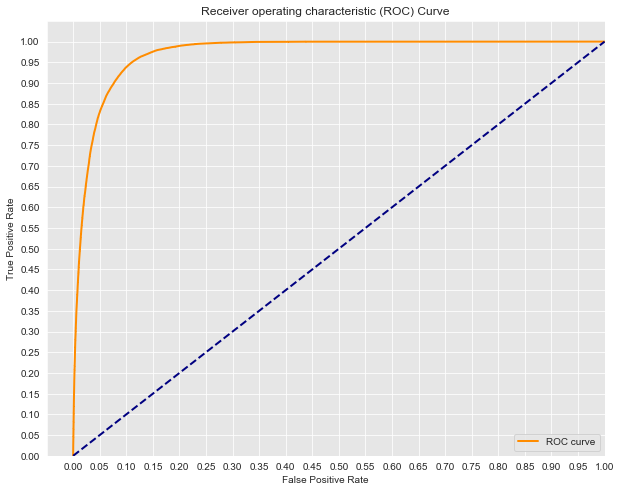

In [31]:
ss=StandardScaler()
lr_scale = ss.fit_transform(lrfeatures)
X_train, X_test, y_train, y_test = train_test_split(lr_scale,lrtarget, random_state=0)
logreg2 = LogisticRegression(C = .1, penalty = 'l2')
#Probability scores for test set
y_score = logreg2.fit(X_train, y_train).decision_function(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Our accuracy did fall, but not significantly even though more than half the remaining features were removed.

In [32]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.97877149, 0.99020302]),
 array([0.99008603, 0.97901916]),
 array([0.98439625, 0.98457933]),
 array([131229, 134313], dtype=int64))

Our precision, recall and f-scores did improve quite well after tuning.

Confusion matrix, without normalization
[[121324  11102]
 [ 11422 121694]]


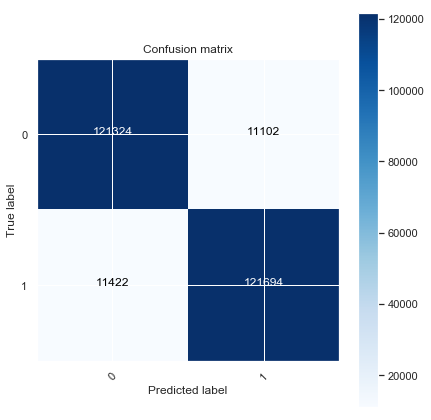

In [54]:
y_hat_test = logreg2.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

The model also lost some precision based on the confusion matrix retest. Both False Negaitves and False Positives increased based on the retest.

### Random Forest Retest

Confusion matrix, without normalization
[[128482   1018]
 [  4264 131778]]


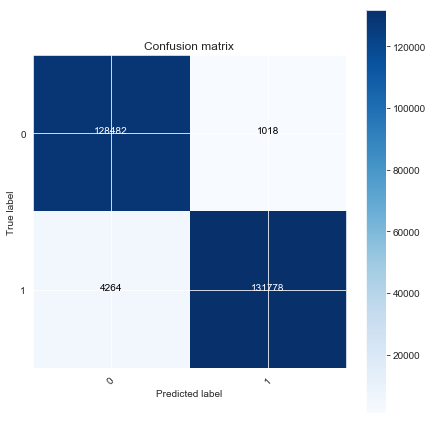

In [33]:
ss=StandardScaler()
rf_scale = ss.fit_transform(lrfeatures)
X_train, X_test, y_train, y_test = train_test_split(rf_scale,rftarget, random_state=0)
#Initial Model
ranfor2 = RandomForestClassifier(n_estimators=300, criterion = 'gini', max_depth = 13, min_samples_split = 20, min_samples_leaf = 8)
#Probability scores for test set
y_score = ranfor2.fit(X_train, y_train)
pred = ranfor2.predict(X_test)
y_hat_test = ranfor2.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

With the removal of more than half the features and tuning our parameters, our model has improved its prediction of True Positives better and has decreased its prediction of True Negatives. Let's look at out train and test scores.

In [56]:
ranfor2.score(X_train, y_train)

0.982543834983631

In [57]:
ranfor2.score(X_test, y_test)

0.981807021111538

We did lose about 1% of accuracy based on our rescore, which explains some noise in the data that was reduced due to eliminating the additional features. Training and test accuracy is very close to each other.

In [35]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.91406144, 0.91713606]),
 array([0.91685179, 0.91435435]),
 array([0.91545449, 0.91574309]),
 array([132342, 133200], dtype=int64))

Interestingly, the precision, recall and f-score went down after the tuning. Shows that this model was sensitive to the imbalanced data and the noise.

### XGBoost Retest

In [37]:
ss=StandardScaler()
xgb_scale = ss.fit_transform(xgbfeatures)
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xgb_scale,xgbtarget, random_state=0)
xgb2 = xgb.XGBClassifier(learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=200)
xgb2.fit(X_train, y_train)
training_preds = xgb2.predict(X_train)
val_preds = xgb2.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 99.4%
Validation accuracy: 99.4%


With the removal of the additional features and hyperparameter tuning, our training and test scores actually improved in this model.

Confusion matrix, without normalization
[[132300   1137]
 [   446 131659]]


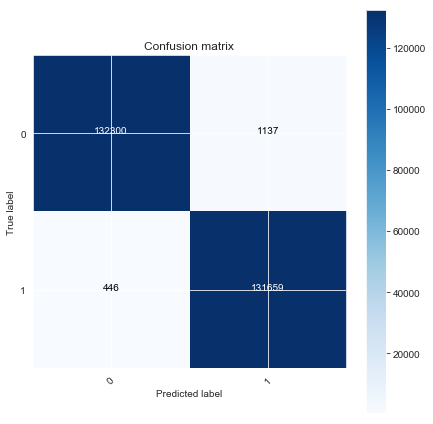

In [38]:
y_hat_test = xgb2.predict(X_test)
cnf_matrix = confusion_matrix(y_hat_test, y_test)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Improvement on both predictions of True Positives and Negatives, though more towards Negatives. At this point, the XGBoost model does perform the best given the data, but it may be possible by adding a couple more features to the Random Forest model may outperform this model.

In [39]:
precision_recall_fscore_support(y_hat_test, y_test)

(array([0.9966402, 0.991438 ]),
 array([0.99147912, 0.9966239 ]),
 array([0.99405296, 0.99402418]),
 array([133437, 132105], dtype=int64))

Also marked improvement in precision, recall and our f-score.

## Conclusion

The goal of this project was to determine what, if any, features can predict a win in the game of Player Unknown's Battlegrounds to uncover some business insights into this ultra-competitive market. Since different features would benefit certain match types over others, the data was separated into solo, duo and squad matchtypes. 

After initial observation of the PUBG dataset, it was determined that while the dataset was large and clean, it was also imbalanced. Values leaned towards the 0 value. Further scrubbing was performed by removing features that showed collinearity towards other features, was classifying data and had no useable data to incorporate. SMOTE was performed to handle the imbalanced data and the data was scaled.

Logistic Regression, Random Forest and XGBoost models were utilized to predict the target. The initial models performed did show promise, as accuracy in our training and test results for all models were in the high 90% range. It was detremined that additional features could be removed to reduce noise. Features were ranked by model, resampled for balance again and scaled. Also, hyperparameter tuning was performed on the updated data for each model via GridSearch.

As a result, the Logistic Regression model did lose a little accuracy, but the prediction power was greatly improved. The Random Forest model showed similar results, with accuracy being slightly reduced, but True Positive prediction increased. The model that showed the greatest improvement via tuning and feature reduction was the XGBoost model. Accuracy improved in both training and test sets as well as the predictive power of the model.

It is recommended that this data be revisted and models tested for the duo matches and squad matches as well. Also, the Random Forest model outperformed the XGBoost model in the initial run. This may validate further investigation into feature selection and tuning for that particular model.